In [26]:
import random
import torch
from torch.utils import data
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w=torch.tensor([2, -3.4])
true_b=4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.7752,  1.4468]) 
label: tensor([-2.2621])


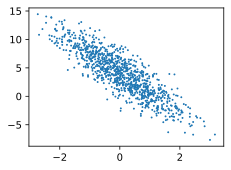

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [7]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

batch_size=10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.8349, -0.8210],
        [ 1.3652,  0.0438],
        [-0.0460,  2.0513],
        [ 0.9181,  0.0911],
        [-0.0500,  0.3153],
        [ 2.5126,  0.1854],
        [ 0.8062,  0.9228],
        [ 0.3349, -0.8795],
        [ 0.5986,  0.0759],
        [-1.0085,  0.3225]]) 
 tensor([[ 8.6599],
        [ 6.7866],
        [-2.8718],
        [ 5.7193],
        [ 3.0379],
        [ 8.6101],
        [ 2.6659],
        [ 7.8563],
        [ 5.1495],
        [ 1.0740]])


In [23]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [9]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [10]:

def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [20]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

In [24]:
lr=0.02
num_epochs=15
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.350769
epoch 2, loss 0.008387
epoch 3, loss 0.000256
epoch 4, loss 0.000054
epoch 5, loss 0.000048
epoch 6, loss 0.000048
epoch 7, loss 0.000048
epoch 8, loss 0.000048
epoch 9, loss 0.000048
epoch 10, loss 0.000048
epoch 11, loss 0.000048
epoch 12, loss 0.000048
epoch 13, loss 0.000048
epoch 14, loss 0.000048
epoch 15, loss 0.000048


In [25]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-2.2411e-05,  4.7684e-06], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0010], grad_fn=<RsubBackward1>)
